In [39]:
import pandas as pd
import numpy as np

In [40]:
# nossa implementação segue as formulas matematicas vista em: https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Examples
# e adaptando algumas coisas vistas em https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/ 
# onde a implementação mostrada era para naive bayes

class gnbNaiveBayer:
  def __init__(self, prior=None, n_class=None, 
               mean=None, variance = None, classes=None):
    # suposição prévia de probabilidade
    self.prior = prior
    # Quantidade de classes unicas
    self.n_class = n_class
    # Media do valor x
    self.mean = mean
    # varianca do valor x
    self.variance = variance
    # Classes de target label
    self.classes = classes


  # funcao para treinamento do algoritmo
  def fit(self, x, y):
    # obtemos a média e a variância dos valores de x
    self.x = x
    self.y = y
    self.mean = np.array(x.groupby(by=y).mean())
    self.variance = np.array(x.groupby(by=y).var())
    self.n_class = len(np.unique(y))
    self.classes = np.unique(y)
    self.prior = 1/self.n_class
    self.mean_variance()
    return self


  def predict(self, X):
    self.X = X
    # Aqui é feito o calculo das probabilidades

    # média e a variância dividida nas classes.

    split_class = self.split()
    probability = []
    for i in range(self.n_class):
      # pega cada classe infomrada como unica para o algoritmo
      class_get = split_class[i]
      for i in range(len(class_get)):
        # primeiro valor na classe
        class_get_x_mean = class_get[i][0]
        class_get_x_var = class_get[i][1]
        x_value = X[i]
        # Calcula as probabilidades em cada classe. 
        probability.append([self.gnb_formula(x_value, class_get_x_mean, 
                                   class_get_x_var)])

    # transforma as probabilidade em array

    prob_array = np.array(probability)

    # Quebra a probabilidade em suas classes novamente

    prob_split = np.vsplit(prob_array, self.n_class)

    # Calcula a probabilidade final

    final_probabilities = []

    for i in prob_split:
      class_prob = np.prod(i) * self.prior
      final_probabilities.append(class_prob)

    # probabilidade maxima
    maximum_prob = max(final_probabilities)

    # Index da probabilidade maxima
    prob_index = final_probabilities.index(maximum_prob)

    # Usando o index da probabilidade maxima para pegar a classe correspondente
    prediction = self.classes[prob_index]

    return prediction


  def gnb_formula(self, x_val, x_mean, x_var):
    self.x_val = x_val
    self.x_mean = x_mean
    self.x_var = x_var

    pi = np.pi
    # log natural
    e = np.e

    # 1 dividido pela raiz quadrada 2 * pi * y_variance
    equation_1 = 1/(np.sqrt(2 * pi * x_var))
    
    # Denominador da equacao
    denom = 2 * x_var

    numerator = (x_val - x_mean) ** 2
    expo = np.exp(-(numerator/denom))
    prob = equation_1 * expo

    return prob

  def mean_variance(self):
    # media e variancia do dataset de treino 
    media = np.array(self.mean)
    varience = np.array(self.variance)

    # coloca em uma lista a combinação de  média e a variância
    self.mean_variance = []
    for i in range(len(media)):
      m_row = media[i]
      v_row = varience[i]
      for a, b in enumerate(m_row):
        mean = b
        var = v_row[a]
        self.mean_variance.append([mean, var])

  def split(self):
    mean = self.mean_variance
    numberOfClass = self.n_class
    spt = np.vsplit(np.array(mean), numberOfClass)
    return spt

# Pré-processamento dados pinguins PARA GAUSSIAN

In [41]:
pinguins = pd.read_csv("../penguins.csv")
pinguins = pinguins.sample(frac = 1)
target_name = "Species"

In [42]:
#Numero por classe
label_1 = pinguins[pinguins['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
print(len(label_1))
label_2 = pinguins[pinguins['Species'] == 'Gentoo penguin (Pygoscelis papua)']
print(len(label_2))
label_3 = pinguins[pinguins['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
print(len(label_3))

152
124
68


In [43]:
# Realizando random nos dados antes de remover
label_1 = label_1.sample(frac = 1)
label_2 = label_2.sample(frac = 1)

In [44]:
label_1 = label_1.iloc[0:152]
label_2 = label_2.iloc[0:124]

In [45]:
newDataset = pd.concat([label_1,label_2,label_3])
newDataset = newDataset.sample(frac = 1)


In [46]:
print(len(newDataset))

344


In [47]:
y_values =  newDataset.drop(columns=["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)","studyName","Sample Number","Region","Island","Stage","Individual ID", "Clutch Completion","Date Egg", "Sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", "Comments", "Body Mass (g)"  ])
x_values =  newDataset.drop(columns=[target_name,"studyName","Sample Number","Region","Island","Stage","Individual ID", "Clutch Completion","Date Egg", "Sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", "Comments", "Body Mass (g)"  ])

In [48]:
y_values.head()

,Species
246,Gentoo penguin (Pygoscelis papua)
124,Adelie Penguin (Pygoscelis adeliae)
333,Chinstrap penguin (Pygoscelis antarctica)
98,Adelie Penguin (Pygoscelis adeliae)
115,Adelie Penguin (Pygoscelis adeliae)


In [49]:
x_values.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
246,44.5,14.7,214.0
124,35.2,15.9,186.0
333,49.3,19.9,203.0
98,33.1,16.1,178.0
115,42.7,18.3,196.0


In [50]:
#quebra os dados em 70 30
y_values_train = y_values.iloc[0:240]
x_value_train = x_values.iloc[0:240]
y_value_test = y_values.iloc[240:344]
x_value_test = x_values.iloc[240:344]


In [51]:
#Numero por classe treino
label_1 = y_values_train[y_values_train['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
print(len(label_1))
label_2 = y_values_train[y_values_train['Species'] == 'Gentoo penguin (Pygoscelis papua)']
print(len(label_2))
label_3 = y_values_train[y_values_train['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
print(len(label_3))

105
89
46


In [52]:
#Numero por classe teste
label_1 = y_value_test[y_value_test['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
print(len(label_1))
label_2 = y_value_test[y_value_test['Species'] == 'Gentoo penguin (Pygoscelis papua)']
print(len(label_2))
label_3 = y_value_test[y_value_test['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
print(len(label_3))

47
35
22


In [53]:
x_value_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
246,44.5,14.7,214.0
124,35.2,15.9,186.0
333,49.3,19.9,203.0
98,33.1,16.1,178.0
115,42.7,18.3,196.0


In [54]:
y_values_train.head()

,Species
246,Gentoo penguin (Pygoscelis papua)
124,Adelie Penguin (Pygoscelis adeliae)
333,Chinstrap penguin (Pygoscelis antarctica)
98,Adelie Penguin (Pygoscelis adeliae)
115,Adelie Penguin (Pygoscelis adeliae)


In [55]:
#converte as classes label em numericas retornando um array em formato de array numerico

def convertStringClassToNumber(dataset):
    convertClass = []
    for index, row in dataset.iterrows():
        if(row['Species'] == "Adelie Penguin (Pygoscelis adeliae)"):
            convertClass.append(0)
        elif(row['Species'] == "Gentoo penguin (Pygoscelis papua)"):
             convertClass.append(1)
        else:
             convertClass.append(2)
            
    return convertClass

y_values_train_knn = convertStringClassToNumber(y_values_train)
convertText = convertStringClassToNumber(y_values_train)
y_values_train = pd.Series(convertText)
convertText = convertStringClassToNumber(y_value_test)
y_value_test = pd.Series(convertText)

In [56]:
y_values_train.head()

0    1
1    0
2    2
3    0
4    0
dtype: int64

In [57]:
x_value_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
246,44.5,14.7,214.0
124,35.2,15.9,186.0
333,49.3,19.9,203.0
98,33.1,16.1,178.0
115,42.7,18.3,196.0


In [58]:
y_values_train.head()

0    1
1    0
2    2
3    0
4    0
dtype: int64

# Treinamento e Inferência


In [59]:
gnb = gnbNaiveBayer()

In [60]:
gnb.fit(x_value_train, y_values_train)

In [61]:
y_value_test.head()

0    0
1    0
2    1
3    2
4    0
dtype: int64

In [62]:
transform_to_array = x_value_test.to_numpy()

y_hat1 = gnb.predict(transform_to_array[0])

In [63]:
y_hat1

0

In [64]:
x_value_test.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
8,34.1,18.1,193.0
91,41.1,18.1,205.0
242,47.5,15.0,218.0
298,43.2,16.6,187.0
149,37.8,18.1,193.0


In [65]:
x_value_test.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
8,34.1,18.1,193.0
91,41.1,18.1,205.0
242,47.5,15.0,218.0
298,43.2,16.6,187.0
149,37.8,18.1,193.0


In [66]:
y_value_test.head()

0    0
1    0
2    1
3    2
4    0
dtype: int64

In [67]:
def get_predict_value(array):
    predicts = []
    for x_value in array:
        y = gnb.predict(x_value)
        predicts.append(y)
    return predicts
        
        

In [68]:
predicts = get_predict_value(transform_to_array)


In [69]:
# matriz de confusao Gaussian
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(y_value_test, predicts))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.22      0.14      0.17        35
           2       0.09      0.14      0.11        22

    accuracy                           0.52       104
   macro avg       0.43      0.42      0.42       104
weighted avg       0.53      0.52      0.52       104



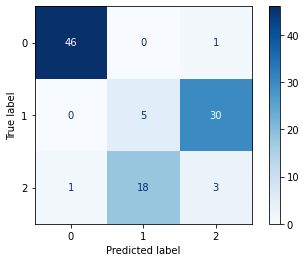

In [70]:
cm = confusion_matrix(y_value_test, predicts, labels=[0,1,2])
display_confusion_matrix = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])
display_confusion_matrix.plot(cmap=plt.cm.Blues)